
<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework. Lecture 3.4:</font> <br> Random Walk. </center>

# TASK: T1

<p align="justify"> <font face="Verdana" size="2.5">
1. Find the vector $\vec d$ and the stationary distribution $\vec \pi$ to the random walk in figure 1.<br>
     <center><img src="https://github.com/freddyduitama/images/blob/master/rw-exercise.png?raw=true"  height="200" width="180"></center><br>
<caption><center><font color='0B5345'> <u> <b>Figure 1:</b><br> </u>Random walk</font></center></caption>
</p>

<p align="justify"> <font face="Verdana" size="2.5">
2. Consider the MC in figure 2, where $0 < p < 1$ and the labels on the arrows indicate transaction probabilities.<br>
<ul> <font face="Verdana" size="2.5">
<li>Define $M$  and find the stationary distribution</li>    
<li>What is the limit of $M^n$ as $n \to \infty $ </li>
</ul>
 <center><img src="https://github.com/freddyduitama/images/blob/master/exercise-7-2.png?raw=true"  height="100" width="300"></center><br>
<caption><center><font color='0B5345'> <u> <b>Figure 2:</b><br> </u>Random walk</font></center></caption>
</p>

<p align="justify"> <font face="Verdana" size="2.5">
3. Find the stationary distribution of the Markov chain in fig. 3. To do that, prove that it is reversible without using matrices. <br><br>

<center><img src="https://github.com/freddyduitama/images/blob/master/reversible-mc.png?raw=true"  height="120" width="400"></center>
<caption><center><font color='0B5345'> <u> <b>Figure 3:</b><br> </u>Reversible MC</font></center></caption>
</p>

# TASK: T2

<p align="justify"> <font face="Verdana" size="2.5">
1. Write the randomized version for the <b>s-t connectivity</b> algorithm.
</p>

<p align="left"><b> <font face="Comic Sans MS" size = "2.5" color="0B5345">Algorithm 1: s-t connectivity($G$, $s$, $t$) </font> </b>  

<ul> <font face="Verdana" size="2.5">
<li>
<font face="Comic Sans MS" size = "2.5"><font color="922B21"> <b>Start </b></font> random walk on $G$ from $s$. </font></li>
<li><font face="Comic Sans MS" size = "2.5">current_node := s.</li>
<li> <font face="Comic Sans MS" size = "2.5">
<font color="922B21"><b> Repeat up </b></font> to $2 m^3$ times or <font color="922B21"><b>until </b></font> random walk reaches $t$ (current_node = t).
</font>
<br><font face="Comic Sans MS" size = "2.5">
&ensp;&ensp;&ensp; Choose</font> $c$ an arbitrary neighbor of current_node<br>
&ensp;&ensp;&ensp;current_node := $c$.</li>
<li> <font face="Comic Sans MS" size = "2.5">
<font color="922B21"><b>If</b> </font></font>current_node = $t$ <font color="922B21"><b>then</b></font> Return ("there is a  path.")<br>&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&emsp;&ensp;<font color="922B21"><b>else </b> </font> Return ("The is no path.")</li>
</ul>

### I Sign in grader.

In [1]:
# sign in
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
# Please DON'T MODIFY THIS CODE
init.course_id = "LOGICA_3.v1"
#init.course_id = "bigdata.v2"
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.04", varname="student");

logging in as estiven.carmona@udea.edu.co... please wait
using course session LOGICA_3.v1::2023.2
success!! you are logged in


### II. Add your solution

In [3]:
import networkx as nx
import numpy as np
import random
# create a undirected graph
def create_graph(n,p)    :                                   # number of nodes, probability of edge creation
    G = nx.Graph()
    G.add_nodes_from(range(1, n+1))                         # add nodes to the graph
# add edges to the graph with the given probability
    for i in range(1, n+1):
        for j in range(i+1, n+1):
            if random.random() < p:
               G.add_edge(i, j)
    return G

In [4]:
#Random walk
def random_walk(Graph, start_node, end_node):
  path = [start_node]
  ### START CODE HERE ###
  max_steps = 2 * len(Graph.nodes())**3
  steps = 0
  while steps < max_steps:
      neighbors = list(Graph.neighbors(path[-1]))
      if not neighbors:
          return []
      chosen_neighbor = random.choice(neighbors)
      path.append(chosen_neighbor)
      if chosen_neighbor == end_node:
          return path
      steps += 1
  ### END CODE HERE ###
  return path

### III. Test your solution

In [5]:
# test graph
G = create_graph(50,0.2)

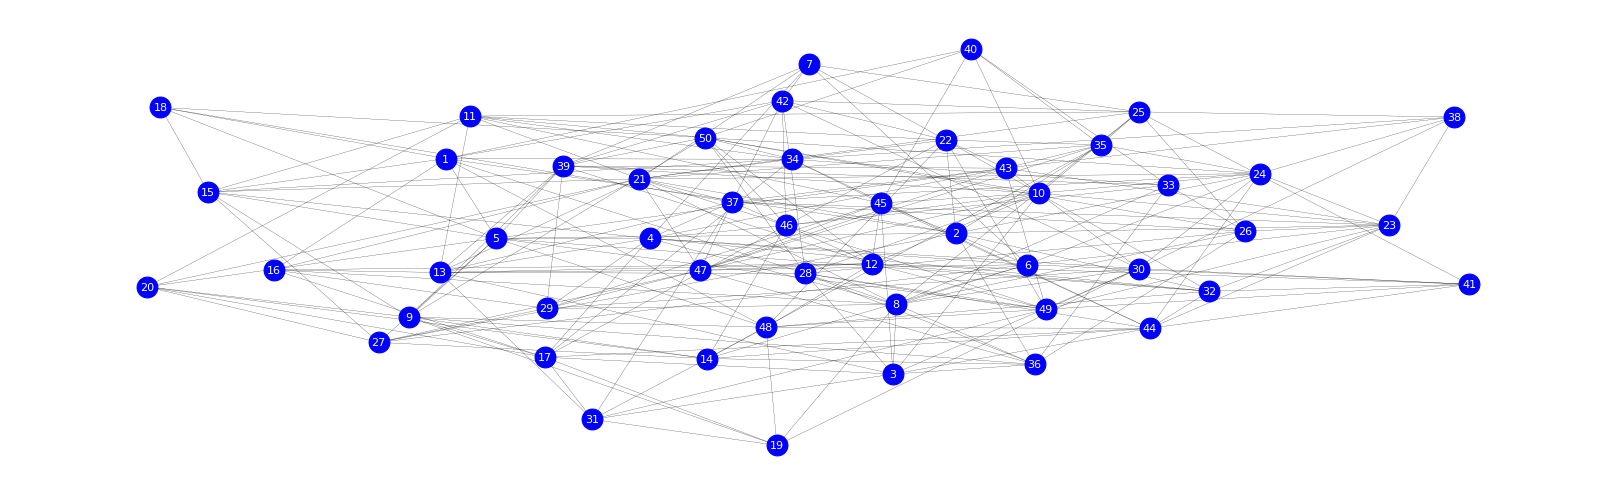

In [6]:
# visualize the graph
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
nx.draw(G, with_labels=True,font_size=10,font_color= 'white', node_color='blue',node_size=350,width=0.2)

In [7]:
path=random_walk(G, 1, 19)
path

[1,
 2,
 24,
 35,
 47,
 29,
 45,
 3,
 8,
 16,
 8,
 16,
 29,
 39,
 13,
 37,
 43,
 49,
 43,
 5,
 18,
 15,
 4,
 17,
 34,
 22,
 32,
 2,
 21,
 35,
 47,
 35,
 14,
 46,
 37,
 18,
 1,
 40,
 33,
 36,
 3,
 36,
 2,
 36,
 2,
 22,
 7,
 6,
 24,
 2,
 5,
 1,
 42,
 22,
 2,
 36,
 2,
 23,
 38,
 25,
 42,
 1,
 34,
 11,
 50,
 9,
 15,
 34,
 33,
 34,
 44,
 23,
 2,
 21,
 15,
 1,
 34,
 44,
 45,
 6,
 23,
 43,
 35,
 47,
 36,
 14,
 35,
 25,
 11,
 15,
 18,
 37,
 26,
 36,
 47,
 29,
 8,
 21,
 34,
 44,
 41,
 12,
 49,
 43,
 30,
 3,
 10,
 3,
 28,
 36,
 14,
 20,
 17,
 31,
 37,
 4,
 6,
 41,
 30,
 38,
 24,
 50,
 28,
 3,
 10,
 12,
 48,
 9,
 50,
 34,
 17,
 19]

In [8]:
path_graph=nx.path_graph(path)

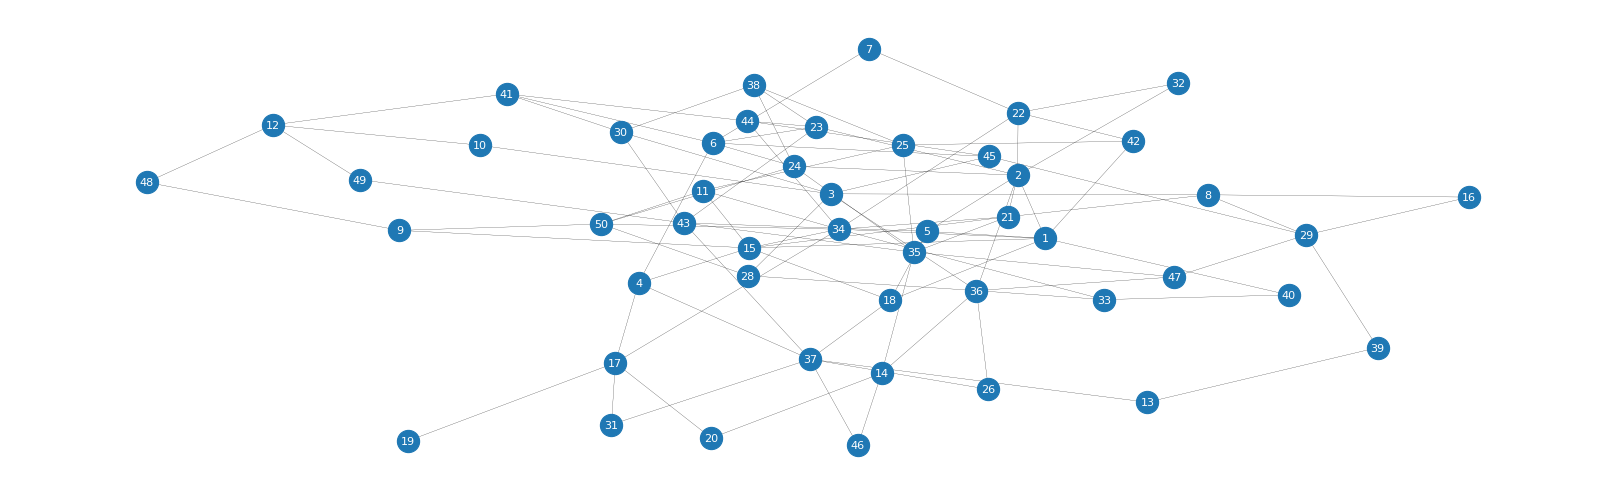

In [9]:
figure(figsize=(20, 6), dpi=80)
nx.draw(path_graph, with_labels=True,font_size=10,font_color= 'white', node_size=400,width=0.2)

### IV. Submit your solution to the grader

In [10]:
## Student
student.submit_task(globals(), task_id="T2");